In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


           Date  PA confirmed  RI confirmed  PA deaths  RI deaths
0    2020-01-22             0             0          0          0
1    2020-01-23             0             0          0          0
2    2020-01-24             0             0          0          0
3    2020-01-25             0             0          0          0
4    2020-01-26             0             0          0          0
..          ...           ...           ...        ...        ...
433  2021-03-30       1020306        136419      25051       2613
434  2021-03-31       1024858        136419      25095       2613
435  2021-04-01       1028750        136419      25122       2613
436  2021-04-02       1033406        136419      25150       2613
437  2021-04-03       1038750        138255      25190       2630

[438 rows x 5 columns]


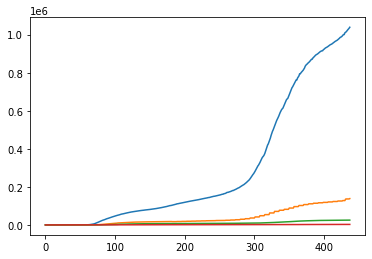

In [411]:

data = pd.read_csv('20.csv')
print(data)

plt.figure()
plt.plot(data["PA confirmed"])
plt.plot(data["RI confirmed"])
plt.plot(data["PA deaths"])
plt.plot(data["RI deaths"])
plt.show()

           Date  PA confirmed  RI confirmed  PA deaths  RI deaths
0    2020-01-22           0.0           0.0        0.0        0.0
1    2020-01-23           0.0           0.0        0.0        0.0
2    2020-01-24           0.0           0.0        0.0        0.0
3    2020-01-25           0.0           0.0        0.0        0.0
4    2020-01-26           0.0           0.0        0.0        0.0
..          ...           ...           ...        ...        ...
433  2021-03-30        5035.0           0.0       33.0        0.0
434  2021-03-31        4552.0           0.0       44.0        0.0
435  2021-04-01        3892.0           0.0       27.0        0.0
436  2021-04-02        4656.0           0.0       28.0        0.0
437  2021-04-03        5344.0        1836.0       40.0       17.0

[438 rows x 5 columns]
dataset size :  438 , -ve data in RI confirmed :  2
-ve data in RI deaths :  4


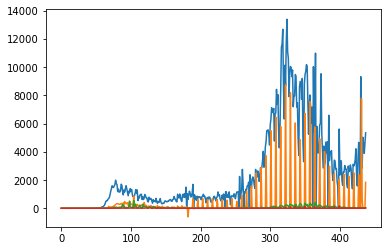

92
Date            2020-06-01
PA confirmed             0
RI confirmed          -613
PA deaths                0
RI deaths              -20
dtype: object


<ipython-input-412-443b93321394>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_feb_march = data[data["Date"] >= '2020-06-01'][data["Date"] <= '2020-08-31']


In [412]:
data["PA confirmed"] = data["PA confirmed"].diff()
data["RI confirmed"] = data["RI confirmed"].diff()
data["PA deaths"] = data["PA deaths"].diff()
data["RI deaths"] = data["RI deaths"].diff()
data = data.fillna(0)
print(data)

print("dataset size : ", len(data), ", -ve data in RI confirmed : ", len(data["RI confirmed"][data["RI confirmed"]<0]))
print("-ve data in RI deaths : ", len(data["RI deaths"][data["RI deaths"]<0]))

plt.figure()
plt.plot(data["PA confirmed"])
plt.plot(data["RI confirmed"])
plt.plot(data["PA deaths"])
plt.plot(data["RI deaths"])
plt.show()


data_feb_march = data[data["Date"] >= '2020-06-01'][data["Date"] <= '2020-08-31']

print(len(data_feb_march))
print(data_feb_march.min())


**2C) Inference the equality of distributions in the two states (distribution of daily #cases and daily #deaths) for the last three months of 2020 (Oct, Nov, Dec)**

In [460]:

data_oct_to_dec = data[data["Date"] >= '2020-10-01'][data["Date"] <= '2020-12-31']

pa_confirmed = np.array(data_oct_to_dec["PA confirmed"]).astype('int')
ri_confirmed = np.array(data_oct_to_dec["RI confirmed"]).astype('int')

pa_deaths = np.array(data_oct_to_dec["PA deaths"]).astype('int')
ri_deaths = np.array(data_oct_to_dec["RI deaths"]).astype('int')


<ipython-input-460-7e3f13397f70>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_oct_to_dec = data[data["Date"] >= '2020-10-01'][data["Date"] <= '2020-12-31']


In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson, binom, geom

**K-S Test 1-sample and 2-Sample**

For 1-sample we are using MME to find the parameter estimates for PA data and testing if that is same for RI data

In [462]:

def get_eCDF(data, s, e):
    
    n = len(data)
    cdf = [0.0]
    
    for i in range(0, n):
        cdf = cdf + [cdf[len(cdf)-1] + (1/n)]
        
    return cdf
    
def plot_eCDF(data, cdf, label, s, e):
    
    # Since the ecdf has two values for some x, we have to create new x and y lists from cdf
    n = len(data)
    x, y = [s], [0]
    
    
    for i in range(0, n):
        x = x + [data[i], data[i]]
        y = y + [cdf[i], cdf[i+1]]
      
    x = x + [e]
    y = y + [1.0]  
    
    
    plt.plot(x, y, label=label)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend(loc='best')
    
def cdf_at_x(data, cdf, x):
    
    # finding the first element larger than the x and then we take cdf value at that point
    x_i = -1
    for i, d in enumerate(data):
        if d >= x:
            x_i = i
            break
            
    return cdf[x_i]

def k_s_test_2_sample(pa, ri, c = 0.05):
    
    # Sort the data to get the CDFs
    pa, ri = np.sort(pa), np.sort(ri)
    
    s = min(pa[0], ri[0]) - 100
    e = max(pa[len(pa) - 1], ri[len(ri) - 1]) + 100
    
    
    F_pa = get_eCDF(pa, s, e)
    F_ri = get_eCDF(ri, s, e)   
    
    fig= plt.figure(figsize=(12,9))
    plt.grid(True)
    plt.title("K-S Test 2-Sample PA vs RI")
    plot_eCDF(pa, F_pa, "PA", s, e)
    plot_eCDF(ri, F_ri, "RI", s, e)  
    
    # pa CDF at ri change points
    F_pa = [cdf_at_x(pa, F_pa, cp) for cp in ri]
    F_ri_minus, F_ri_plus = F_ri[0:-1], F_ri[1:]

    ks_stat = ks_index = 0
    
    # y value for the vertical line at ks_index
    ymin = 0
    
    for i in range(0, len(F_pa)):
        if abs(F_pa[i] - F_ri_minus[i]) > ks_stat:
            ks_stat = abs(F_pa[i] - F_ri_minus[i])
            ks_index = i
            ymin = min(F_ri_minus[ks_index], F_pa[ks_index])
        if abs(F_pa[i] - F_ri_plus[i]) > ks_stat:
            ks_stat = abs(F_pa[i] - F_ri_plus[i])
            ks_index = i
            ymin = min(F_ri_plus[ks_index], F_pa[ks_index])

    
    print("ks_stat is {} at {}, where as c is {}".format(ks_stat, ri[ks_index], c))
    if ks_stat > c:
        print("d > c, So, we reject Null Hypothesis")
    else:
        print("d <= c, So, we accept Null Hypothesis")

    plt.plot([ri[ks_index], ri[ks_index]],[ymin, ymin + ks_stat])
    plt.annotate("K-S statistic = " + str(ks_stat), xy = [ri[ks_index] + int((e-s)/100), ymin + ks_stat/4], rotation = 90)
    plt.show()
    
    return

def k_s_test_1_sample(pa, ri, dist='poisson', c = 0.05):
    
    pa_mean = np.mean(pa)
    pa_var = np.var(pa)

    # Sort the data to get the CDFs
    pa, ri = np.sort(pa), np.sort(ri)
    
    s = min(pa[0], ri[0]) - 100
    e = max(pa[len(pa) - 1], ri[len(ri) - 1]) + 100
    
    F_pa = []
    F_ri = get_eCDF(sorted_ri_confirmed, s, e)
    
    # pa CDF at ri change points
    if dist == 'poisson':
        lam_mme = pa_mean
        F_pa = [poisson.cdf(cp, lam_mme) for cp in ri] 
    elif dist == 'binomial':
        p_mme = 1 - pa_var/pa_mean
        n_mme = pa_mean/p_mme
        F_pa = [binom.cdf(cp, n_mme, p_mme) for cp in ri]
    elif dist == 'geometric':  
        p_mme = 1/pa_mean
        F_pa = [geom.cdf(cp, p_mme) for cp in ri]
        
    F_ri_minus, F_ri_plus = F_ri[0:-1], F_ri[1:]

    ks_stat = ks_index = 0
    
    for i in range(0, len(X)):
        if abs(F_pa[i] - F_ri_minus[i]) > ks_stat:
            ks_stat = abs(F_pa[i] - F_ri_minus[i])
            ks_index = i
        if abs(F_pa[i] - F_ri_plus[i]) > ks_stat:
            ks_stat = abs(F_pa[i] - F_ri_plus[i])
            ks_index = i

    
    print("ks_stat is {} at {}, where as c is {}".format(ks_stat, ri[ks_index], c))
    if ks_stat > c:
        print("d > c, So, we reject Null Hypothesis")
    else:
        print("d <= c, So, we accept Null Hypothesis")

    
    return

**K-S Test 1 Sample - PA Confimed assumed to be poisson distribution vs RI Confimed, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Confimed is poisson distribution with parameters obtained from MME on PA Confimed.

Alternate Hypothesis: $H_1$ = RI Confimed is poisson distribution with parameters obtained from MME on PA Confimed.

In [463]:
k_s_test_1_sample(pa_confirmed, ri_confirmed)

ks_stat is 0.934782544262669 at 4854, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 1 Sample - PA Deaths assumed to be poisson distribution vs RI Deaths, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Deaths is poisson distribution with parameters obtained from MME on PA Deaths.

Alternate Hypothesis: $H_1$ = RI Deaths is poisson distribution with parameters obtained from MME on PA Deaths.

In [464]:
k_s_test_1_sample(pa_deaths, ri_deaths)

ks_stat is 0.9513040514523106 at 62, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 1 Sample - PA Confimred aussmed to be binomial distribution vs RI Confimred, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Confimred is binomial distribution with parameters obtained from MME on PA Confimred.

Alternate Hypothesis: $H_1$ = RI Confimred is binomial distribution with parameters obtained from MME on PA Confimred.

In [465]:
k_s_test_1_sample(pa_confirmed, ri_confirmed, dist='binomial')

ks_stat is 1.0 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 1 Sample - PA Deaths assumed to be binomial distribution vs RI Deaths, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Deaths is binomial distribution with parameters obtained from MME on PA Deaths.

Alternate Hypothesis: $H_1$ = RI Deaths is binomial distribution with parameters obtained from MME on PA Deaths.

In [466]:
k_s_test_1_sample(pa_deaths, ri_deaths, dist='binomial')

ks_stat is 1.0 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 1 Sample - PA Confirmed assumed to be geometric distribution vs RI Confimred, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Confimred is geometric distribution with parameters obtained from MME on PA Confimred.

Alternate Hypothesis: $H_1$ = RI Confimred is geometric distribution with parameters obtained from MME on PA Confimred.

In [467]:
k_s_test_1_sample(pa_confirmed, ri_confirmed, dist='geometric')

ks_stat is 0.8586956521739143 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 1 Sample - PA Deaths assumed to be geometric distribution vs RI Deaths, threshold, c = 0.05**

Null Hypothesis: $H_o$ = RI Deaths is geometric distribution with parameters obtained from MME on PA Deaths.

Alternate Hypothesis: $H_1$ = RI Deaths is geometric distribution with parameters obtained from MME on PA Deaths.

In [468]:
k_s_test_1_sample(pa_deaths, ri_deaths, dist='geometric')

ks_stat is 0.8586956521739143 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


**K-S Test 2 Sample - threshold, c = 0.05**

Null Hypothesis: $H_o$ = PA Confimred and RI Confirmed have similar distributions.

Alternate Hypothesis: $H_1$ = PA Confimred and RI Confimred have different distributions.

ks_stat is 0.8586956521739143 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


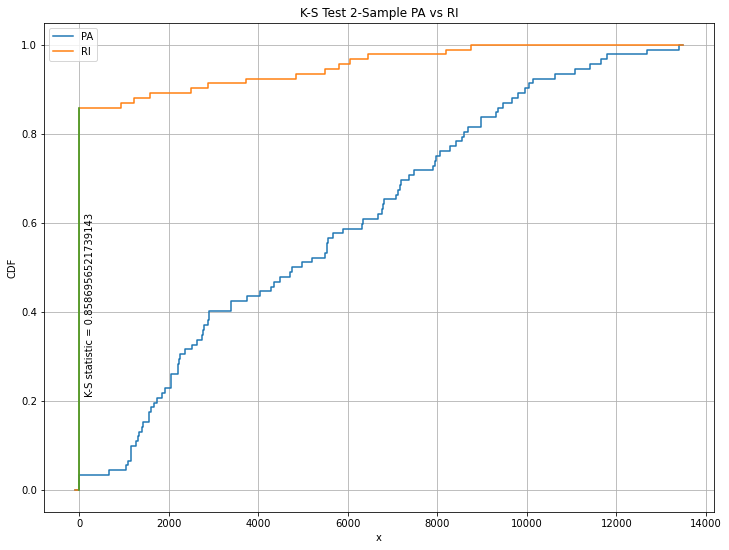

In [469]:
k_s_test_2_sample(pa_confirmed, ri_confirmed)

**K-S Test 2 Sample - threshold, c = 0.05**

Null Hypothesis: $H_o$ = PA Deaths and RI Deaths have similar distributions.

Alternate Hypothesis: $H_1$ = PA Deaths and RI Deaths have different distributions.

ks_stat is 0.8586956521739143 at 0, where as c is 0.05
d > c, So, we reject Null Hypothesis


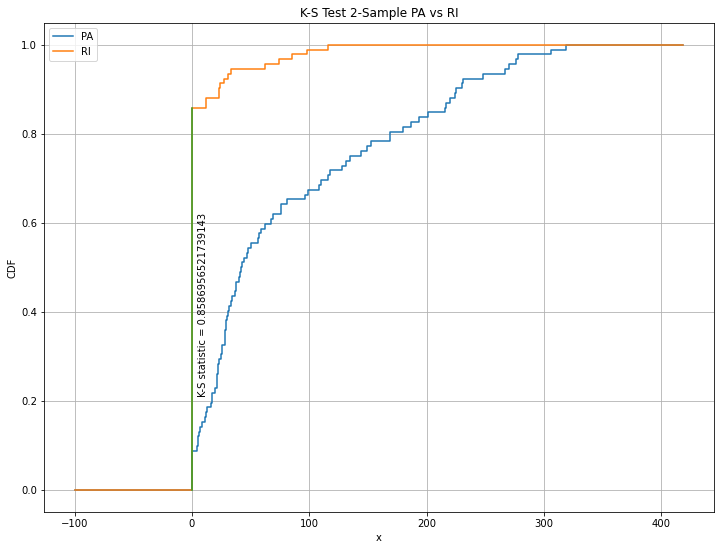

In [470]:
k_s_test_2_sample(pa_deaths, ri_deaths)

**Permutation Test - 1000 permutations, threshold, c = 0.05**

In [473]:
def perm_test(pa, ri, no_of_perm):
    
    count =0
    
    perm_diff = abs(np.mean(pa) - np.mean(ri))    
    covid = np.array(pa.tolist() + ri.tolist())
    
    pa_n = pa.shape[0]
    N = covid.shape[0]
    
    for i in range(no_of_perm):
        perm = np.random.permutation(covid)
        d1 = perm[:pa_n+1]
        d2 = perm[pa_n+1:]
        if (abs(d1.mean() - d2.mean()) > perm_diff):
            count += 1
    
    p_val = count/no_of_perm
    
    return p_val

Null Hypothesis: $H_o$ = PA Confirmed and RI Confirmed have similar distributions.

Alternate Hypothesis: $H_1$ = PA Confirmed and RI Confirmed have different distributions.

In [474]:
c = 0.05
p_val_confirmed = perm_test(pa_confirmed, ri_confirmed, 1000)
print("p-value for confirmed cases = {} <= c = {}. So, we reject Null Hypothesis.".format(p_val_confirmed, c))

p-value for confirmed cases = 0.0 <= c = 0.05. So, we reject Null Hypothesis.


Null Hypothesis: $H_o$ = PA Deaths and RI Deaths have similar distributions.

Alternate Hypothesis: $H_1$ = PA Deaths and RI Deaths have different distributions.

In [475]:
p_val_deaths = perm_test(pa_deaths, ri_deaths, 1000)
print("p-value for deaths = {} <= c = {}. So, we reject Null Hypothesis.".format(p_val_deaths, c))

p-value for deaths = 0.0 <= c = 0.05. So, we reject Null Hypothesis.
